In [1]:
import os
import numpy as np

datapath = '/lustre06/project/6001735/detests_2022/results/task_1/data'
model_filenames = os.listdir(datapath)
assert all([model_filename.endswith('.csv') for model_filename in model_filenames])


print(len(model_filenames))
model_filenames[:5]+['...']+model_filenames[-5:]

80


['mm_roberta-base-bne_mtl_e_15.csv',
 'beto_e_3_frozen.csv',
 'mm_bert-base-multilingual-uncased_mtl_e_5.csv',
 'svm_char_2-2.csv',
 'beto_mtl_e_3.csv',
 '...',
 'beto_mtl_weighed_e_15.csv',
 'beto_mtl_e_15_frozen.csv',
 'mm_bert-base-multilingual-uncased_mtl_e_1.csv',
 'svm_char_2-1.csv',
 'beto_mtl_weighed_e_25_test.csv']

In [2]:
import pandas as pd
data = []
names = []
def variant2modelname(variant):
    if 'bert' in variant and not 'roberta' in variant:
        return 'BERT'
    elif  variant.startswith('beto'):
        return 'BETO'
    elif 'roberta' in variant:
        return 'ROBERTA'
    elif variant.startswith('svm'):
        return 'Support Vector Machine'
    elif variant.startswith('lr'):
        return 'Logistic Regression'
    elif variant.startswith('rf'):
        return 'Random Forest'
    else:
        return 'Unknown'


for filename in model_filenames:
    partial_df = pd.read_csv(os.path.join(datapath, filename))
    if partial_df.shape!=(0,9):
        data.append(partial_df)
        names.append(filename[:-4])
df = pd.concat(data)
df.index=list(range(1,len(df)+1))
df['variant'] = names
df['model'] = list(map(variant2modelname, df['variant']))
df = df.loc[df["test_f1"]!=0,:]
df = df.sort_values('test_f1', ascending=False)
df.index=list(range(1,1+len(df)))
df

,column,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall,variant,model
1,task_1,0.960000,0.978947,1.000000,0.960000,1.000000,1.000000,1.000000,1.000000,mm_bert-base-multilingual-uncased_mtl_e_22,BERT
2,task_1,0.940000,0.968421,1.000000,0.940000,1.000000,1.000000,1.000000,1.000000,mm_bert-base-multilingual-uncased_mtl_e_17,BERT
3,task_1,0.940000,0.968421,1.000000,0.940000,1.000000,1.000000,1.000000,1.000000,beto_mtl_e_17,BETO
4,task_1,0.920000,0.957895,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,mm_bert-base-multilingual-uncased_mtl_e_20,BERT
5,task_1,0.920000,0.957895,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,mm_roberta-base-bne_mtl_e_10,ROBERTA
6,task_1,0.920000,0.957895,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,beto_mtl_e_15,BETO
7,task_1,0.920000,0.956725,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,mm_roberta-base-bne_mtl_e_15,ROBERTA
8,task_1,0.920000,0.956725,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,beto_mtl_e_25,BETO
9,task_1,0.920000,0.956725,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,mm_roberta-base-bne_mtl_e_25,ROBERTA
10,task_1,0.920000,0.956725,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,beto_mtl_weighed_e_10,BETO


In [3]:
selected_models = ['beto_mtl_e_20',
                   'mm_roberta-base-bne_mtl_e_17',
                   'mm_roberta-base-bne_mtl_e_15',
                   
                   'mm_bert-base-multilingual-uncased_mtl_e_22',
                   'beto_mtl_e_17',
                   'mm_roberta-base-bne_mtl_e_10',                   
                   'beto_e_15',
                   'svm_char_2-1',                   
                   'lr_char_l2',
                   'rf_char',
                   'rf_word',
                   'lr_word',
                   'svm_word'
                   ]

short_names = ['\\textbf{BETO MTL$_{20}$}',
               '\\textbf{RoBERTa MTL$_{17}$}',
               '\\textbf{RoBERTa MTL$_{15}$}',
               'BERT multilingual MTL$_{22}$',               
               'BETO MTL$_{17}$',               
               'RoBERTa MTL$_{10}$',               
               'BETO$_{15}$',
               'SVM$_{char}$',               
               'LR$_{char}$',
               'RF$_{char}$',
               'RF$_{word}$',
               'LR$_{word}$',
               'SVM$_{word}$'
               ]

model_names = ['Multi-Task Learning (MTL) models',
               'Multi-Task Learning (MTL) models',
               'Multi-Task Learning (MTL) models',
               'Multi-Task Learning (MTL) models',
               'Multi-Task Learning (MTL) models',
               'Multi-Task Learning (MTL) models',
               'Baselines',
               'Baselines',
               'Baselines',
               'Baselines',
               'Baselines',
               'Baselines',
               'Baselines',
              ]
df.index=df['variant']
df = df.loc[np.array(selected_models),:]

df['short_names']=short_names
df['model']=model_names
df.index=list(range(1,1+len(df)))
df

,column,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall,variant,model,short_names
1,task_1,0.880000,0.934503,1.000000,0.880000,1.000000,1.000000,1.000000,1.000000,beto_mtl_e_20,Multi-Task Learning (MTL) models,\textbf{BETO MTL$_{20}$}
2,task_1,0.900000,0.946199,1.000000,0.900000,1.000000,1.000000,1.000000,1.000000,mm_roberta-base-bne_mtl_e_17,Multi-Task Learning (MTL) models,\textbf{RoBERTa MTL$_{17}$}
3,task_1,0.920000,0.956725,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,mm_roberta-base-bne_mtl_e_15,Multi-Task Learning (MTL) models,\textbf{RoBERTa MTL$_{15}$}
4,task_1,0.960000,0.978947,1.000000,0.960000,1.000000,1.000000,1.000000,1.000000,mm_bert-base-multilingual-uncased_mtl_e_22,Multi-Task Learning (MTL) models,BERT multilingual MTL$_{22}$
5,task_1,0.940000,0.968421,1.000000,0.940000,1.000000,1.000000,1.000000,1.000000,beto_mtl_e_17,Multi-Task Learning (MTL) models,BETO MTL$_{17}$
6,task_1,0.920000,0.957895,1.000000,0.920000,1.000000,1.000000,1.000000,1.000000,mm_roberta-base-bne_mtl_e_10,Multi-Task Learning (MTL) models,RoBERTa MTL$_{10}$
7,task_1,0.854070,0.669853,0.696783,0.650923,0.999411,0.998708,0.998852,0.998564,beto_e_15,Baselines,BETO$_{15}$
8,task_1,0.832331,0.614391,0.647452,0.585570,0.961619,0.920844,0.869889,0.978187,svm_char_2-1,Baselines,SVM$_{char}$
9,task_1,0.791199,0.601323,0.533021,0.690043,0.834097,0.686104,0.603772,0.794489,lr_char_l2,Baselines,LR$_{char}$
10,task_1,0.832854,0.476048,0.832093,0.334056,0.999803,0.999569,1.000000,0.999139,rf_char,Baselines,RF$_{char}$


PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `t.pdf'.


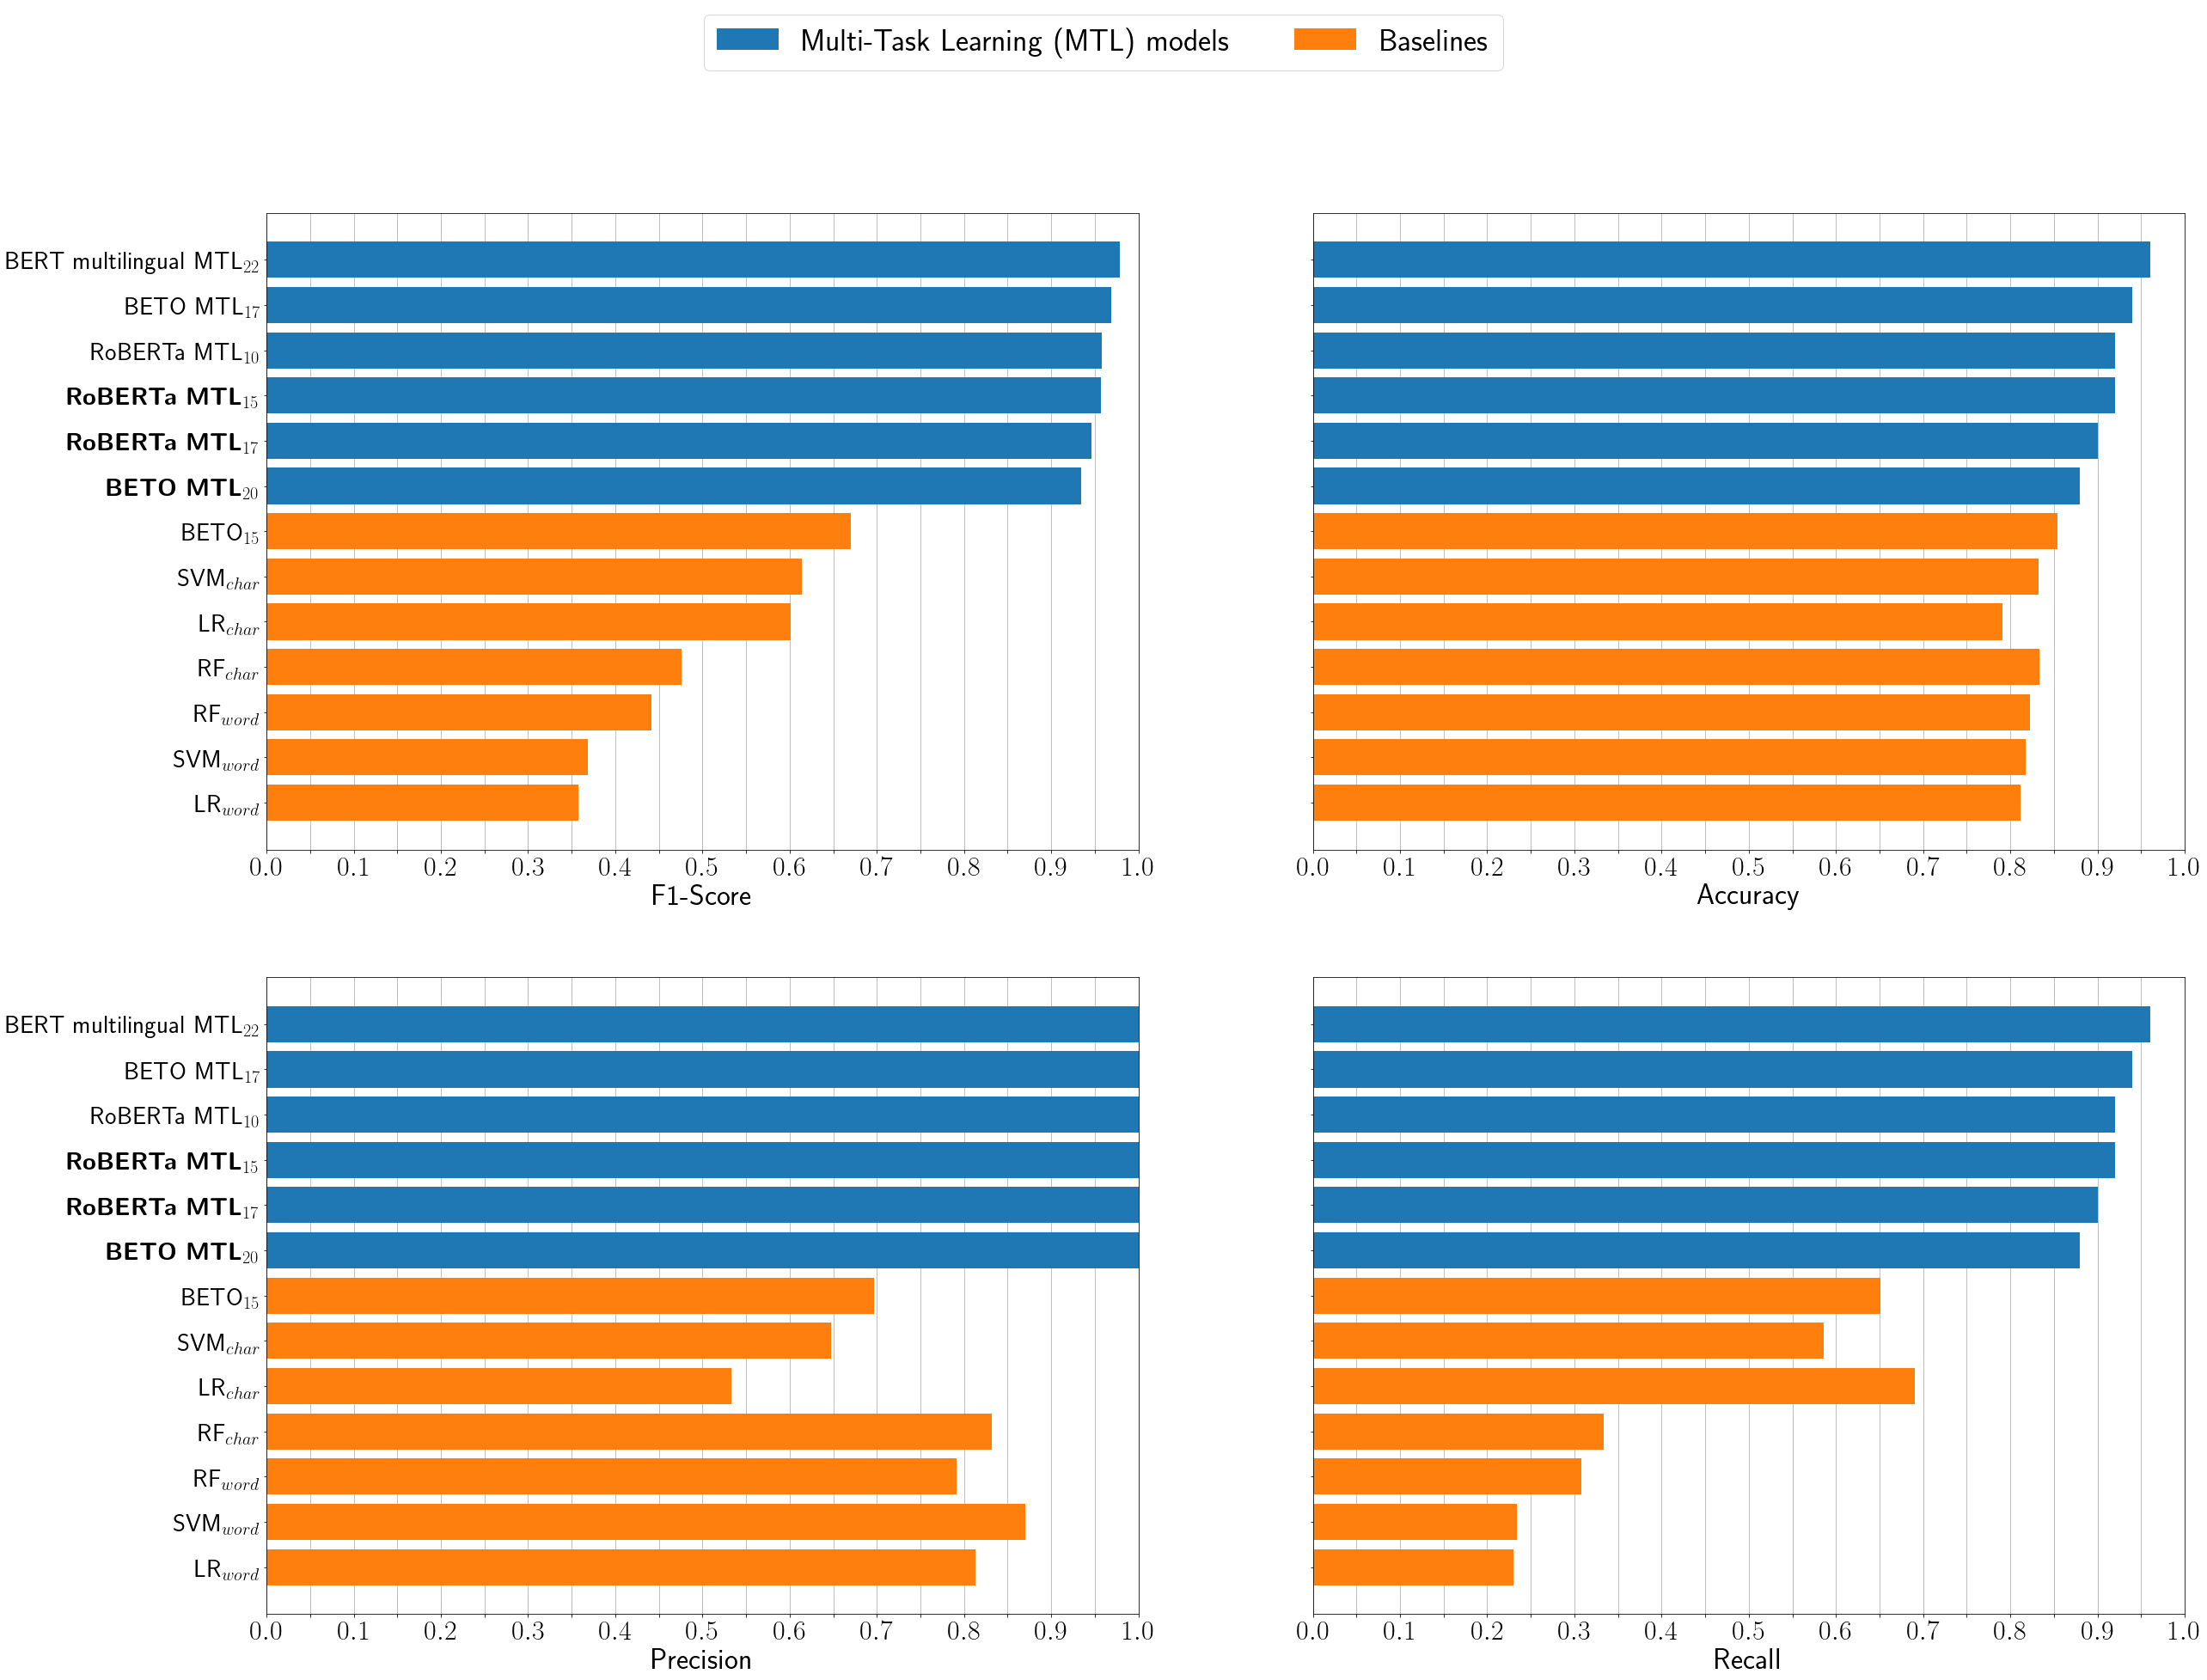

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
# with sns.axes_style("whitegrid"):
df = df.sort_values('test_f1', ascending=True)
df.index=list(range(1,1+len(df)))
plt.rcParams['figure.figsize']=[40,30]
from matplotlib import rc
rc('text', usetex=True)
fig,ax = plt.subplots(2,2)        
prec_ax = ax[1,0]
recall_ax = ax[1,1]
f1_ax = ax[0,0]
acc_ax = ax[0,1]

# df = df.sort_values('test_f1', ascending=False)
colors = ['#7fc97f', '#000000', '#fdc086',  '#beaed4', '#386cb0', '#f0027f']
i=0
for model in set(df['model']):
# for i in range(len(df)):
#     auxdf = df.iloc[i:i+1,:]
    auxdf = df.loc[df['model']==model,:]
    prec_ax.barh(width=auxdf["test_precision"], y=auxdf.index,label=model)#,color='#1f77b4')
    recall_ax.barh(width=auxdf["test_recall"], y=auxdf.index,label=model)#,color='#1f77b4')
    f1_ax.barh(width=auxdf["test_f1"], y=auxdf.index,label=model)#, color='#1f77b4')
    acc_ax.barh(width=auxdf["test_accuracy"], y=auxdf.index,label=model)#,color='#1f77b4')
#     print(model+' '+colors[i])
#     prec_ax.bar(height=auxdf["test_precision"], x=auxdf.index,label=model,color='#1f77b4')
#     recall_ax.bar(height=auxdf["test_recall"], x=auxdf.index,label=model,color='#1f77b4')
#     f1_ax.bar(height=auxdf["test_f1"], x=auxdf.index,label=model,color='#1f77b4')
#     acc_ax.bar(height=auxdf["test_accuracy"], x=auxdf.index,label=model,color='#1f77b4')
#     i+=1
    
i=0
# prec_ax.plot(df["test_precision"], df.index,marker='o', color='black')
# recall_ax.plot(df["test_recall"], df.index,marker='o', color='black')
# f1_ax.plot(df["test_f1"], df.index,marker='o', color='black')
# acc_ax.plot(df["test_accuracy"], df.index,marker='o', color='black')
# for i in range(len(df)):  
#     xs = df['test_precision']
#     ys = list(df.index)
#     strs=[f'${value:4.3f}$' for value in df["test_precision"]]
#     prec_ax.text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=28)
#     xs = df['test_recall']
#     ys = list(df.index)
#     strs=[f'${value:4.3f}$' for value in df["test_recall"]]
#     recall_ax.text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=28)
#     xs = df['test_f1']
#     ys = list(df.index)
#     strs=[f'${value:4.3f}$' for value in df["test_f1"]]
#     f1_ax.text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=28)
#     xs = df['test_accuracy']
#     ys = list(df.index)
#     strs=[f'${value:4.3f}$' for value in df["test_accuracy"]]
#     acc_ax.text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=28)
#     i+=1

prec_ax.set_yticks(df.index,df['short_names'] , weight='bold')


recall_ax.set_yticks(df.index,['']*len(df.index))
f1_ax.set_yticks(df.index,df['short_names'])
acc_ax.set_yticks(df.index,['']*len(df.index))
# prec_ax.set_yticks(df.index,df['variant'])
# recall_ax.set_yticks([],[])
# f1_ax.set_yticks([],[])
# acc_ax.set_yticks([],[])
# recall_ax.set_xticks(df.index,df['variant'])
# f1_ax.set_xticks(df.index,df['variant'])
# prec_ax.set_xticks([],[])
# recall_ax.set_xticks([],[])
# f1_ax.set_xticks([],[])
# prec_ax.set_xticks([],[])
# recall_ax.legend(fontsize=12,loc=4)
prec_ax.tick_params(axis='y', which='major', labelsize=29)
f1_ax.tick_params(axis='y', which='major', labelsize=29)
recall_ax.tick_params(axis='y', which='major', labelsize=29)
acc_ax.tick_params(axis='y', which='major', labelsize=29)

prec_ax.tick_params(axis='x', which='major', labelsize=32)
f1_ax.tick_params(axis='x', which='major', labelsize=32)
recall_ax.tick_params(axis='x', which='major', labelsize=32)
acc_ax.tick_params(axis='x', which='major', labelsize=32)
# f1_ax.tick_params(axis='y',rotation=30)
# prec_ax.tick_params(axis='y',rotation=30)
# f1_ax.tick_params(axis='x',rotation=45)
# acc_ax.tick_params(axis='x',rotation=90)
# prec_ax.tick_params(axis='y',rotation=0)
# prec_ax.set_ylim(0,1)
prec_ax.set_xlabel("Precision",fontsize=34)
recall_ax.set_xlabel("Recall",fontsize=34)
f1_ax.set_xlabel("F1-Score",fontsize=34)
acc_ax.set_xlabel("Accuracy",fontsize=34)
prec_ax.set_xlim(0,1)
recall_ax.set_xlim(0,1)
f1_ax.set_xlim(0,1)
acc_ax.set_xlim(0,1)

# acc_ax.set_xticks(df.index,df['variant'])

# f1_ax.legend(fontsize=28)
xticks = np.linspace(0,1,21)
xticks_lab = [f'${val:2.1f}$' if ix%2==0 else '' for ix,val in enumerate(xticks)]
for ax_aux in [f1_ax, recall_ax, prec_ax, acc_ax]:
    ax_aux.set_xticks(xticks,xticks_lab)
    ax_aux.set_axisbelow(True)
    ax_aux.grid(axis="x")

    
    
handles, labels = f1_ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',fontsize=36, ncol=2)

# acc_ax.legend(loc='upper left', bbox_to_anchor=(1, 1.),fontsize=44)


# # ax.tick_params(axis='both', which='minor', labelsize=24)
fig.show()
fig.savefig('task1_sortedby_f1.pdf')




!pdfcrop --margins '5 10 20 30' task1_sortedby_f1.pdf t.pdf
!mv t.pdf task1_sortedby_f1.pdf

In [9]:

df = df.sort_values('test_f1', ascending=False)
list(df['short_names'])

['BERT multilingual MTL$_{22}$',
 'BETO MTL$_{17}$',
 'RoBERTa MTL$_{10}$',
 '\\textbf{RoBERTa MTL$_{15}$}',
 '\\textbf{RoBERTa MTL$_{17}$}',
 '\\textbf{BETO MTL$_{20}$}',
 'BETO$_{15}$',
 'SVM$_{char}$',
 'LR$_{char}$',
 'RF$_{char}$',
 'RF$_{word}$',
 'SVM$_{word}$',
 'LR$_{word}$']

In [10]:
list(df['variant'])

['mm_bert-base-multilingual-uncased_mtl_e_22',
 'beto_mtl_e_17',
 'mm_roberta-base-bne_mtl_e_10',
 'mm_roberta-base-bne_mtl_e_15',
 'mm_roberta-base-bne_mtl_e_17',
 'beto_mtl_e_20',
 'beto_e_15',
 'svm_char_2-1',
 'lr_char_l2',
 'rf_char',
 'rf_word',
 'svm_word',
 'lr_word']

In [95]:
ax_aux.set_axisbelow?

In [ ]:
prec_ax.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# with sns.axes_style("whitegrid"):
df = df.sort_values('test_f1', ascending=True)
df.index=list(range(1,1+len(df)))
plt.rcParams['figure.figsize']=[18,4]

fig,ax = plt.subplots(1,4)        

# df = df.sort_values('test_f1', ascending=False)
colors = ['#7fc97f', '#000000', '#fdc086',  '#beaed4', '#386cb0', '#f0027f']
i=0
for model in set(df['model']):
# for i in range(len(df)):
#     auxdf = df.iloc[i:i+1,:]
    auxdf = df.loc[df['model']==model,:]
    ax[0].barh(width=auxdf["test_precision"], y=auxdf.index)#,color='#1f77b4')
    ax[1].barh(width=auxdf["test_recall"], y=auxdf.index)#,color='#1f77b4')
    ax[2].barh(width=auxdf["test_f1"], y=auxdf.index)#, color='#1f77b4')
    ax[3].barh(width=auxdf["test_accuracy"], y=auxdf.index)#,color='#1f77b4')
#     print(model+' '+colors[i])
#     ax[0].bar(height=auxdf["test_precision"], x=auxdf.index,label=model,color='#1f77b4')
#     ax[1].bar(height=auxdf["test_recall"], x=auxdf.index,label=model,color='#1f77b4')
#     ax[2].bar(height=auxdf["test_f1"], x=auxdf.index,label=model,color='#1f77b4')
#     ax[3].bar(height=auxdf["test_accuracy"], x=auxdf.index,label=model,color='#1f77b4')
#     i+=1
    
i=0
# ax[0].plot(df["test_precision"], df.index,marker='o', color='black')
# ax[1].plot(df["test_recall"], df.index,marker='o', color='black')
# ax[2].plot(df["test_f1"], df.index,marker='o', color='black')
# ax[3].plot(df["test_accuracy"], df.index,marker='o', color='black')
for i in range(len(df)):  
    xs = df['test_precision']
    ys = list(df.index)
    strs=[f'{value:4.3f}' for value in df["test_precision"]]
    ax[0].text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=9)
    xs = df['test_recall']
    ys = list(df.index)
    strs=[f'{value:4.3f}' for value in df["test_recall"]]
    ax[1].text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=9)
    xs = df['test_f1']
    ys = list(df.index)
    strs=[f'{value:4.3f}' for value in df["test_f1"]]
    ax[2].text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=9)
    xs = df['test_accuracy']
    ys = list(df.index)
    strs=[f'{value:4.3f}' for value in df["test_accuracy"]]
    ax[3].text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=9)
#     i+=1
ax[0].set_yticks(df.index,df['short_names'])
ax[1].set_yticks(df.index,['']*len(df.index))
ax[2].set_yticks(df.index,['']*len(df.index))
ax[3].set_yticks(df.index,['']*len(df.index))
# ax[0].set_yticks(df.index,df['variant'])
# ax[1].set_yticks([],[])
# ax[2].set_yticks([],[])
# ax[3].set_yticks([],[])
# ax[1].set_xticks(df.index,df['variant'])
# ax[2].set_xticks(df.index,df['variant'])
# ax[0].set_xticks([],[])
# ax[1].set_xticks([],[])
# ax[2].set_xticks([],[])
# ax[0].set_xticks([],[])
# ax[1].legend(fontsize=12,loc=4)
# ax[0].tick_params(axis='both', which='major', labelsize=12)
# ax[0].tick_params(axis='x',rotation=45)
# ax[1].tick_params(axis='x',rotation=45)
# ax[2].tick_params(axis='x',rotation=45)
# ax[3].tick_params(axis='x',rotation=90)
# ax[0].tick_params(axis='y',rotation=0)
# ax[0].set_ylim(0,1)
ax[0].set_xlabel("precision",fontsize=14)
ax[1].set_xlabel("recall",fontsize=14)
ax[2].set_xlabel("F1-score",fontsize=14)
ax[3].set_xlabel("accuracy",fontsize=14)
ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
ax[2].set_xlim(0,1)
ax[3].set_xlim(0,1)

# ax[3].set_xticks(df.index,df['variant'])


# # ax.tick_params(axis='both', which='minor', labelsize=24)
fig.show()
fig.savefig('task1_sortedby_f1.pdf')
!pdfcrop --margins '5 10 20 30' task1_sortedby_f1.pdf t.pdf
!mv t.pdf task1_sortedby_f1.pdf

perl: warning: Setting locale failed.
perl: warning: Please check that your locale settings:
	LANGUAGE = (unset),
	LC_ALL = (unset),
	LC_MEASUREMENT = "es_AR.UTF-8",
	LC_PAPER = "es_AR.UTF-8",
	LC_MONETARY = "es_AR.UTF-8",
	LC_NAME = "es_AR.UTF-8",
	LC_ADDRESS = "es_AR.UTF-8",
	LC_NUMERIC = "es_AR.UTF-8",
	LC_TELEPHONE = "es_AR.UTF-8",
	LC_IDENTIFICATION = "es_AR.UTF-8",
	LC_TIME = "es_AR.UTF-8",
	LANG = "en_US.UTF-8"
    are supported and installed on your system.
perl: warning: Falling back to a fallback locale ("en_US.UTF-8").
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `t.pdf'.


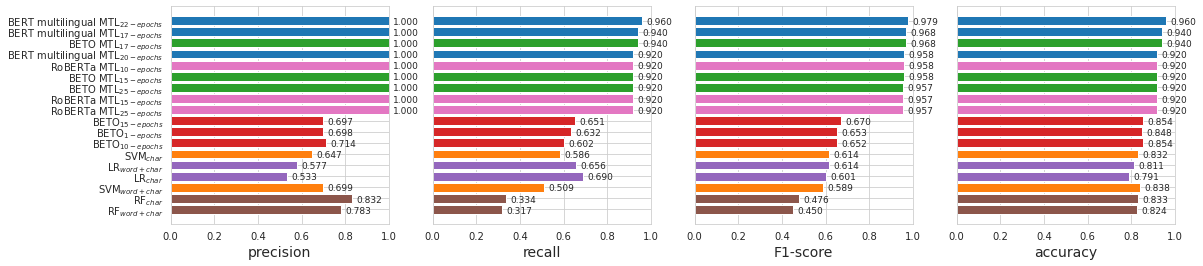

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# with sns.axes_style("whitegrid"):
df = df.sort_values('test_f1', ascending=True)
df.index=list(range(1,1+len(df)))
plt.rcParams['figure.figsize']=[18,4]

fig,ax = plt.subplots(1,4)        

# df = df.sort_values('test_f1', ascending=False)
colors = ['#7fc97f', '#000000', '#fdc086',  '#beaed4', '#386cb0', '#f0027f']
i=0
for model in set(df['model']):
# for i in range(len(df)):
#     auxdf = df.iloc[i:i+1,:]
    auxdf = df.loc[df['model']==model,:]
    ax[0].barh(width=auxdf["test_precision"], y=auxdf.index)#,color='#1f77b4')
    ax[1].barh(width=auxdf["test_recall"], y=auxdf.index)#,color='#1f77b4')
    ax[2].barh(width=auxdf["test_f1"], y=auxdf.index)#, color='#1f77b4')
    ax[3].barh(width=auxdf["test_accuracy"], y=auxdf.index)#,color='#1f77b4')
#     print(model+' '+colors[i])
#     ax[0].bar(height=auxdf["test_precision"], x=auxdf.index,label=model,color='#1f77b4')
#     ax[1].bar(height=auxdf["test_recall"], x=auxdf.index,label=model,color='#1f77b4')
#     ax[2].bar(height=auxdf["test_f1"], x=auxdf.index,label=model,color='#1f77b4')
#     ax[3].bar(height=auxdf["test_accuracy"], x=auxdf.index,label=model,color='#1f77b4')
#     i+=1
    
i=0
# ax[0].plot(df["test_precision"], df.index,marker='o', color='black')
# ax[1].plot(df["test_recall"], df.index,marker='o', color='black')
# ax[2].plot(df["test_f1"], df.index,marker='o', color='black')
# ax[3].plot(df["test_accuracy"], df.index,marker='o', color='black')
for i in range(len(df)):  
    xs = df['test_precision']
    ys = list(df.index)
    strs=[f'{value:4.3f}' for value in df["test_precision"]]
    ax[0].text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=9)
    xs = df['test_recall']
    ys = list(df.index)
    strs=[f'{value:4.3f}' for value in df["test_recall"]]
    ax[1].text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=9)
    xs = df['test_f1']
    ys = list(df.index)
    strs=[f'{value:4.3f}' for value in df["test_f1"]]
    ax[2].text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=9)
    xs = df['test_accuracy']
    ys = list(df.index)
    strs=[f'{value:4.3f}' for value in df["test_accuracy"]]
    ax[3].text(x=xs.iloc[i]+0.02, y=ys[i]-0.3, s=strs[i],fontsize=9)
#     i+=1
ax[0].set_yticks(df.index,df['short_names'])
ax[1].set_yticks(df.index,['']*len(df.index))
ax[2].set_yticks(df.index,['']*len(df.index))
ax[3].set_yticks(df.index,['']*len(df.index))
# ax[0].set_yticks(df.index,df['variant'])
# ax[1].set_yticks([],[])
# ax[2].set_yticks([],[])
# ax[3].set_yticks([],[])
# ax[1].set_xticks(df.index,df['variant'])
# ax[2].set_xticks(df.index,df['variant'])
# ax[0].set_xticks([],[])
# ax[1].set_xticks([],[])
# ax[2].set_xticks([],[])
# ax[0].set_xticks([],[])
# ax[1].legend(fontsize=12,loc=4)
# ax[0].tick_params(axis='both', which='major', labelsize=12)
# ax[0].tick_params(axis='x',rotation=45)
# ax[1].tick_params(axis='x',rotation=45)
# ax[2].tick_params(axis='x',rotation=45)
# ax[3].tick_params(axis='x',rotation=90)
# ax[0].tick_params(axis='y',rotation=0)
# ax[0].set_ylim(0,1)
ax[0].set_xlabel("precision",fontsize=14)
ax[1].set_xlabel("recall",fontsize=14)
ax[2].set_xlabel("F1-score",fontsize=14)
ax[3].set_xlabel("accuracy",fontsize=14)
ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
ax[2].set_xlim(0,1)
ax[3].set_xlim(0,1)

# ax[3].set_xticks(df.index,df['variant'])


# # ax.tick_params(axis='both', which='minor', labelsize=24)
fig.show()
fig.savefig('task1_sortedby_f1.pdf')
!pdfcrop --margins '5 10 20 30' task1_sortedby_f1.pdf t.pdf
!mv t.pdf task1_sortedby_f1.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `t.pdf'.


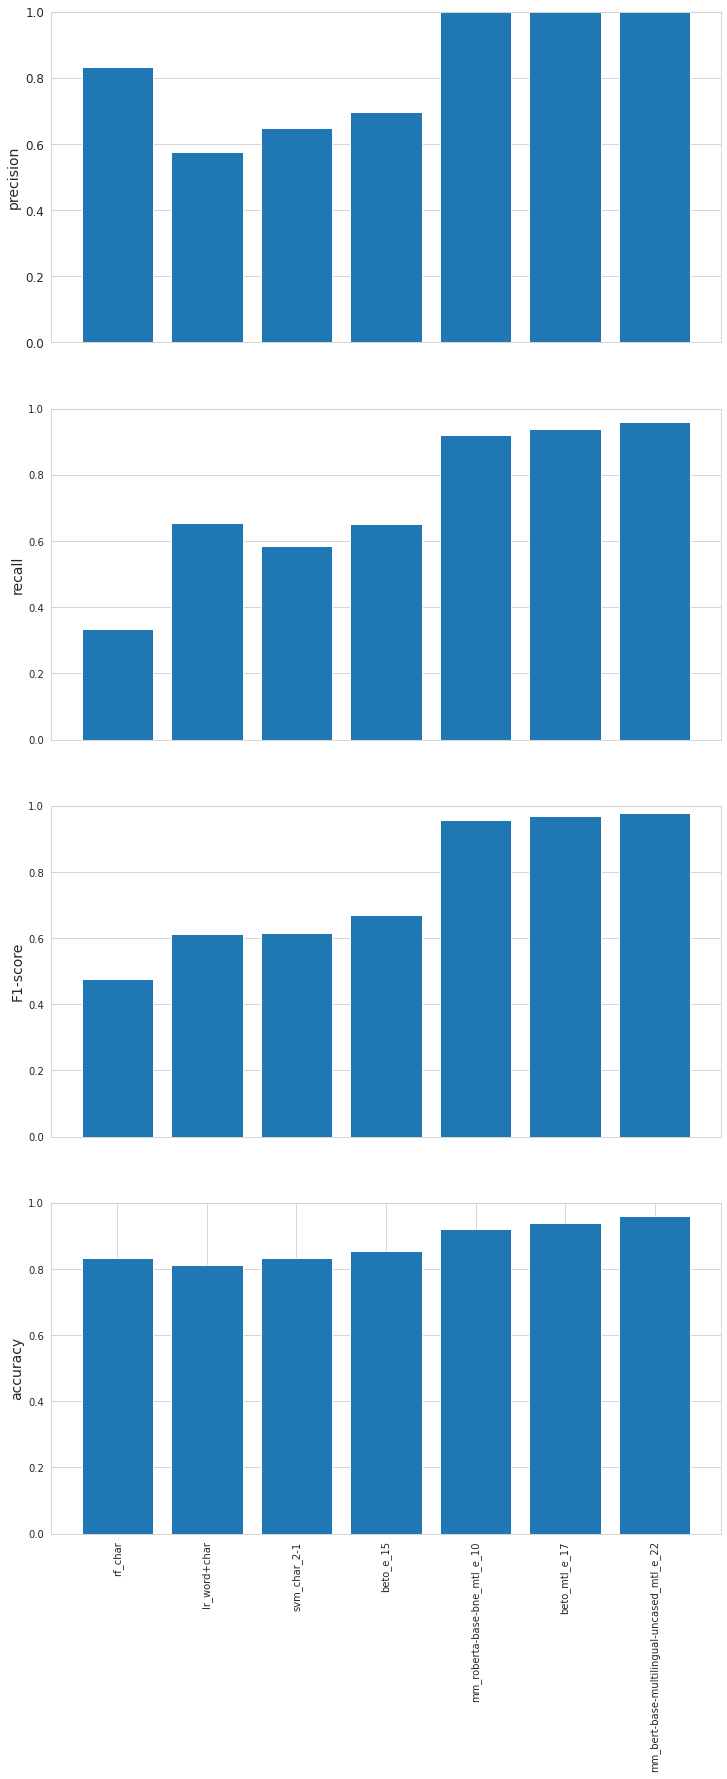

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=[12,28]

fig,ax = plt.subplots(4,1)        
    
colors = ['#7fc97f', '#000000', '#fdc086',  '#beaed4', '#386cb0', '#f0027f']
i=0
for model in set(df['model']):
    auxdf = df[df["model"]==model]
#     ax[0].barh(width=auxdf["test_precision"], y=auxdf.index,label=model,color='#1f77b4')
#     ax[1].barh(width=auxdf["test_recall"], y=auxdf.index,label=model,color='#1f77b4')
#     ax[2].barh(width=auxdf["test_f1"], y=auxdf.index,label=model,color='#1f77b4')
#     print(model+' '+colors[i])
    ax[0].bar(height=auxdf["test_precision"], x=auxdf.index,label=model,color='#1f77b4')
    ax[1].bar(height=auxdf["test_recall"], x=auxdf.index,label=model,color='#1f77b4')
    ax[2].bar(height=auxdf["test_f1"], x=auxdf.index,label=model,color='#1f77b4')
    ax[3].bar(height=auxdf["test_accuracy"], x=auxdf.index,label=model,color='#1f77b4')
    i+=1
    
# i=0

# for i in range(len(df)):  
#     xs = df['test_precision']
#     ys = list(df.index)
#     strs=[f'{value:4.3f}' for value in df["test_precision"]]
#     ax[0].text(x=xs.iloc[i], y=ys[i]-0.05, s=strs[i],fontsize=14)
#     xs = df['test_recall']
#     ys = list(df.index)
#     strs=[f'{value:4.3f}' for value in df["test_recall"]]
#     ax[1].text(x=xs.iloc[i], y=ys[i]-0.05, s=strs[i],fontsize=14)
#     xs = df['test_f1']
#     ys = list(df.index)
#     strs=[f'{value:4.3f}' for value in df["test_f1"]]
#     ax[2].text(x=xs.iloc[i], y=ys[i]-0.05, s=strs[i],fontsize=14)
#     i+=1
# ax[0].set_xticks(df.index,df['variant'])
# ax[1].set_xticks(df.index,df['variant'])
# ax[2].set_xticks(df.index,df['variant'])
ax[0].set_xticks([],[])
ax[1].set_xticks([],[])
ax[2].set_xticks([],[])
# ax[0].set_xticks([],[])
# ax[1].legend(fontsize=12,loc=4)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='x',rotation=45)
ax[1].tick_params(axis='x',rotation=45)
ax[2].tick_params(axis='x',rotation=45)
ax[3].tick_params(axis='x',rotation=90)
ax[0].tick_params(axis='y',rotation=0)
ax[0].set_ylim(0,1)
ax[0].set_ylabel("precision",fontsize=14)
ax[1].set_ylabel("recall",fontsize=14)
ax[2].set_ylabel("F1-score",fontsize=14)
ax[3].set_ylabel("accuracy",fontsize=14)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)
ax[3].set_ylim(0,1)

ax[3].set_xticks(df.index,df['variant'])


# ax.tick_params(axis='both', which='minor', labelsize=24)
fig.show()
fig.savefig('task1_sortedby_f1.pdf')
!pdfcrop --margins '5 10 20 30' task1_sortedby_f1.pdf t.pdf
!mv t.pdf task1_sortedby_f1.pdf

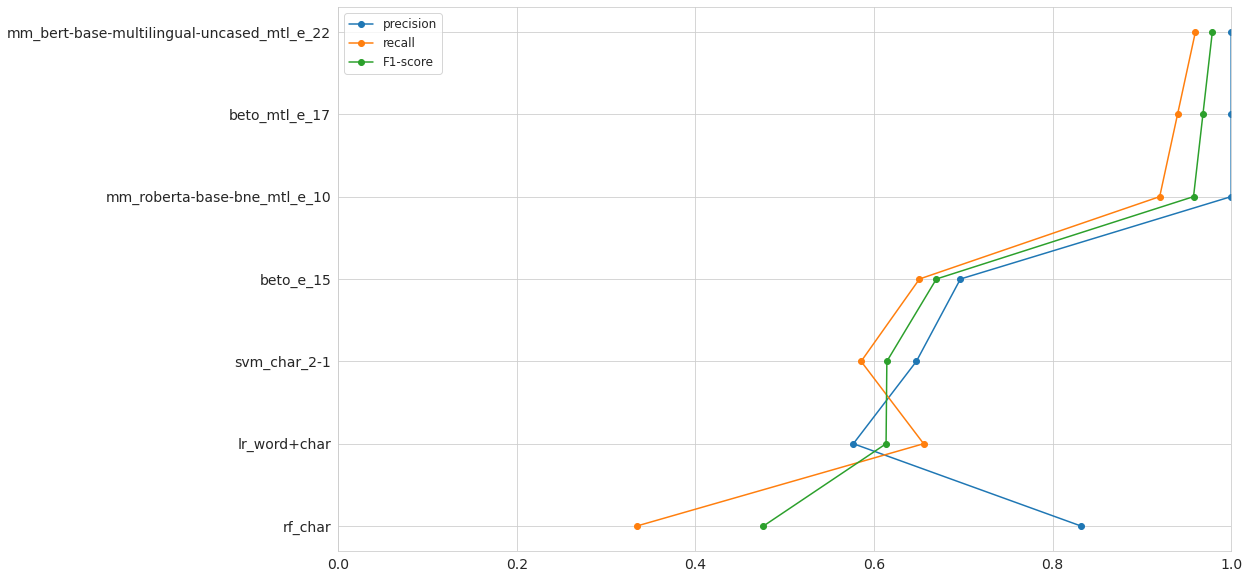

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=[16,10]

fig,ax = plt.subplots(1)        
    
colors = ['#7fc97f', '#000000', '#fdc086',  '#beaed4', '#386cb0', '#f0027f']
i=0

ax.plot(df['test_precision'],range(1,len(df)+1), marker='o',label='precision')
ax.plot(df['test_recall'],range(1,len(df)+1), marker='o',label='recall')
ax.plot(df['test_f1'],range(1,len(df)+1), marker='o',label='F1-score')
ax.legend(fontsize=12)
ax.set_xlim(0,1)

ax.set_yticks(df.index,df['variant'])
# for model in set(df['model']):
#     auxdf = df[df["model"]==model]
#     ax[0].barh(width=auxdf["test_precision"], y=auxdf.index,label=model,color='#1f77b4')
#     ax[1].barh(width=auxdf["test_recall"], y=auxdf.index,label=model,color='#1f77b4')
#     ax[2].barh(width=auxdf["test_f1"], y=auxdf.index,label=model,color='#1f77b4')
# #     print(model+' '+colors[i])
#     i+=1
    
# i=0

# for i in range(len(df)):  
#     xs = df['test_precision']
#     ys = list(df.index)
#     strs=[f'{value:4.3f}' for value in df["test_precision"]]
#     ax[0].text(x=xs.iloc[i], y=ys[i]-0.05, s=strs[i],fontsize=14)
#     xs = df['test_recall']
#     ys = list(df.index)
#     strs=[f'{value:4.3f}' for value in df["test_recall"]]
#     ax[1].text(x=xs.iloc[i], y=ys[i]-0.05, s=strs[i],fontsize=14)
#     xs = df['test_f1']
#     ys = list(df.index)
#     strs=[f'{value:4.3f}' for value in df["test_f1"]]
#     ax[2].text(x=xs.iloc[i], y=ys[i]-0.05, s=strs[i],fontsize=14)
#     i+=1
# ax[0].set_yticks(df.index,df['variant'])
# ax[1].set_yticks([],[])
# ax[2].set_yticks([],[])
# # ax[1].legend(fontsize=12,loc=4)
ax.tick_params(axis='both', which='major', labelsize=14)
# ax[0].tick_params(axis='y',rotation=0)
# ax[0].set_xlim(0,1)
# ax[0].set_xlabel("precision",fontsize=14)
# ax[1].set_xlabel("recall",fontsize=14)
# ax[2].set_xlabel("F1-score",fontsize=14)
# ax[1].set_xlim(0,1)
# ax[2].set_xlim(0,1)
# # ax.tick_params(axis='both', which='minor', labelsize=24)
# fig.show()
# fig.savefig('task1_sortedby_f1.pdf')
# !pdfcrop --margins '5 10 20 30' task1_sortedby_f1.pdf t.pdf
# !mv t.pdf task1_sortedby_f1.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `t.pdf'.


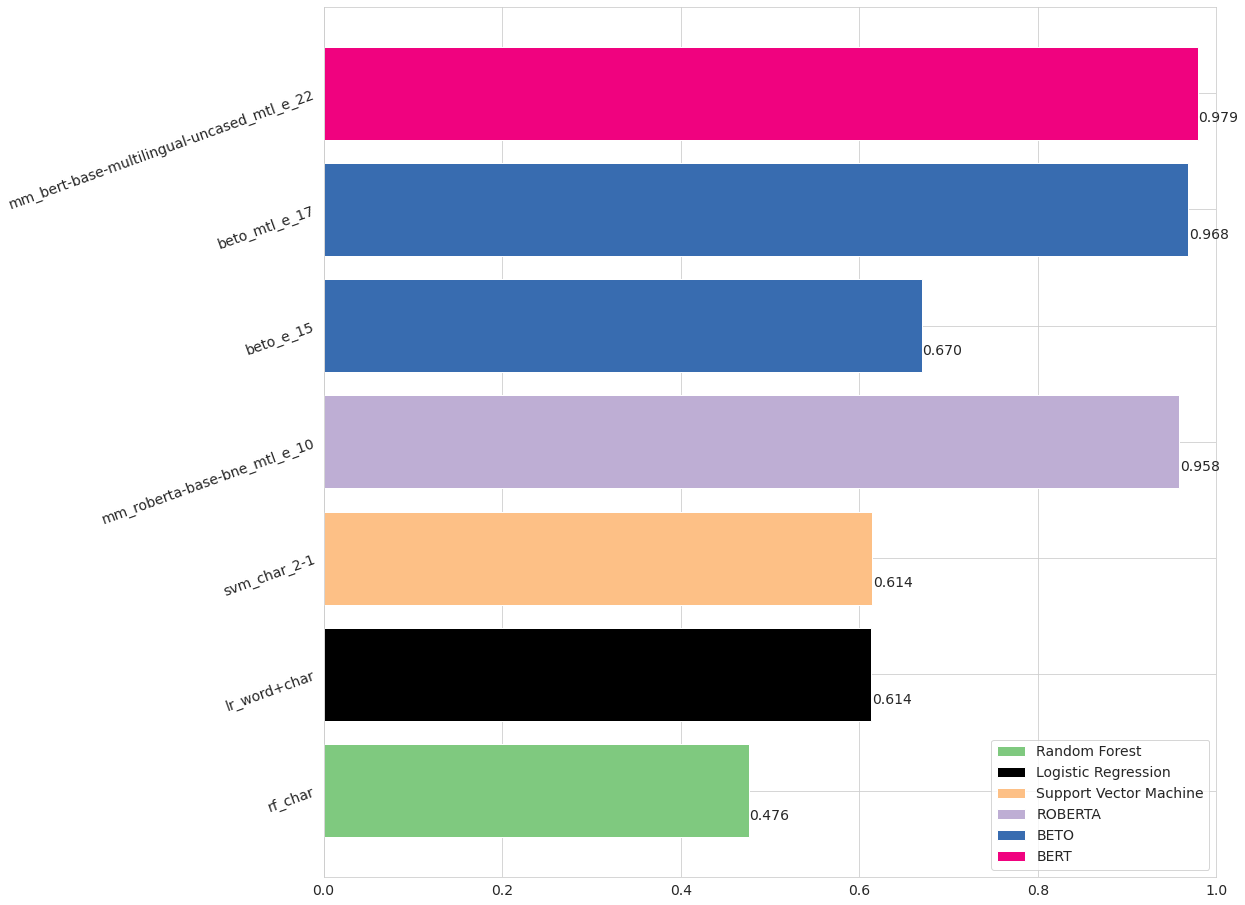

In [28]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.rcParams['figure.figsize']=[16,16]
# df = df.sort_values('test_f1', ascending=True)
# df.index=list(range(1,1+len(df)))
# fig,ax = plt.subplots(1)        
    
# colors = ['#7fc97f', '#000000', '#fdc086',  '#beaed4', '#386cb0', '#f0027f']
# ix=0
# start_point=0

    
    
# for model in np.array(['BERT', 'BETO', 'ROBERTA', 'Support Vector Machine', 'Logistic Regression', 'Random Forest'])[::-1]:
#     auxdf = df[df["model"]==model]
#     ax.barh(width=auxdf["test_f1"], y=auxdf["variant"],label=model,color=colors[ix])
# #     print(model+' '+colors[i])
#     ix+=1
    
#     i=0
#     xs = auxdf['test_f1']
#     ys = list(range(start_point, start_point+len(auxdf)))
#     start_point=start_point+len(auxdf)
#     strs=[f'{value:4.3f}' for value in auxdf["test_f1"]]
#     for i in range(len(auxdf)):    
#         ax.text(x=xs.iloc[i]+0.001, y=ys[i]-0.25, s=strs[i],fontsize=14)
#         i+=1
# # ax.set_yticks(df.index,df['variant'])
# ax.legend(fontsize=14)
# ax.tick_params(axis='both', which='major', labelsize=14)
# ax.tick_params(axis='y',rotation=20)
# ax.set_xlim(0,1)
# fig.show()
# fig.savefig('task1_by_model.pdf')
# !pdfcrop --margins '5 10 20 30' task1_by_model.pdf t.pdf
# !mv t.pdf task1_by_model.pdf